In [42]:
import re, unicodedata
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
# import packages
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from dash import Dash, html, dcc
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

import pickle, os

In [28]:
# import csv
data = pd.read_csv("dataset-urls.csv")
data

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel
...,...,...,...,...
1403,1403,http://www.oldwomen.org/,old nude women porn mature granny sex horny ol...,Adult
1404,1404,http://www.webcamslave.com,bdsm cams bdsm chat bondage cams free bdsm vid...,Adult
1405,1405,http://www.buyeuroporn.com/,porno dvd online european porn dvd cheap adult...,Adult
1406,1406,http://www.analdreamhouse.com/30/03/agecheck/i...,anal dream house anal dream house anal dream h...,Adult


In [29]:
# Data per kategori 

data["Category"].value_counts()

Education                          114
Business/Corporate                 109
Travel                             107
Streaming Services                 105
Sports                             104
E-Commerce                         102
Games                               98
News                                96
Health and Fitness                  96
Photography                         93
Computers and Technology            93
Food                                92
Law and Government                  84
Social Networking and Messaging     83
Forums                              16
Adult                               16
Name: Category, dtype: int64

In [30]:
# hapus duplicate data

data.drop_duplicates(subset=['cleaned_website_text'], inplace = True)

In [31]:
# melihat jumlah data

data.count()
data.Category.value_counts()

Education                          114
Business/Corporate                 108
Travel                             106
Streaming Services                 104
E-Commerce                         101
Sports                             100
Games                               98
News                                92
Food                                92
Computers and Technology            90
Health and Fitness                  89
Photography                         87
Law and Government                  83
Social Networking and Messaging     79
Forums                              16
Adult                               16
Name: Category, dtype: int64

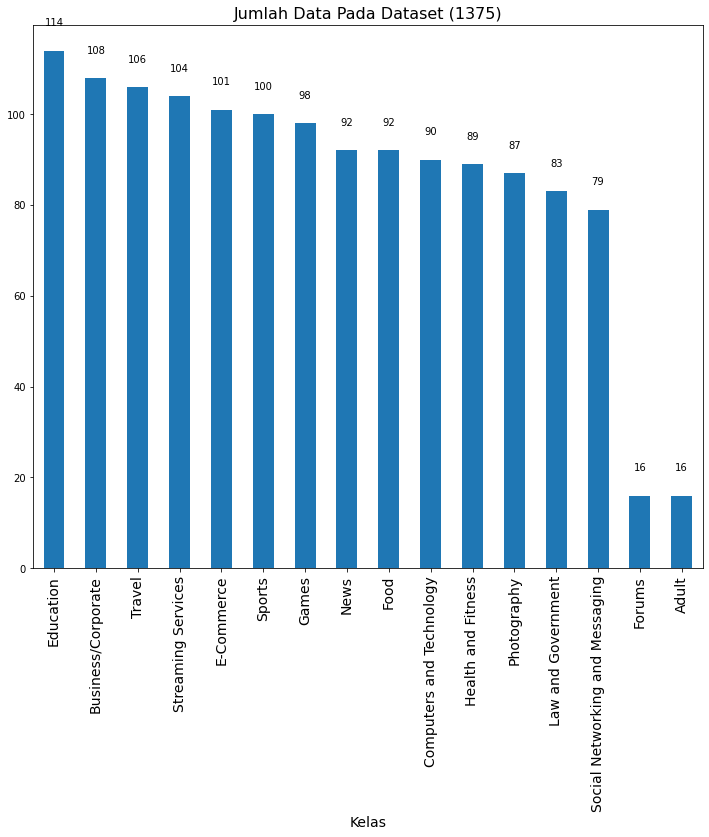

In [55]:
x = data.cleaned_website_text
y = data.Category

data_count = y.value_counts()

freq_series = pd.Series(data_count)

x_labels = ['Education','Business/Corporate','Travel','Streaming Services','E-Commerce','Sports','Games','News','Food','Computers and Technology','Health and Fitness','Photography','Law and Government','Social Networking and Messaging','Forums', 'Adult']

# Plot the figure.
plt.figure(figsize=(12, 10))
ax = freq_series.plot(kind="bar")
ax.set_title(f"Jumlah Data Pada Dataset ({y.count()})", size=16)
ax.set_xlabel("Kelas", size=14)
ax.set_xticklabels(x_labels, size=14)

rects = ax.patches


labels = [f"{i}" for i in data_count]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()


In [56]:
# split data using k fold
x = data.cleaned_website_text
y = data.Category

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=5)

kf=KFold(n_splits=10, shuffle=False)
print(kf)  #buat tau Kfold dan parameter defaultnya

i = 0

for train_index, test_index in kf.split(x):
    i += 1
    print("Fold ", i)
    print("TRAIN :", train_index, "TEST :", test_index)
#     x_train=x,train_index
#     x_test=x,test_index
#     y_train=y,train_index
#     y_test=y,test_index
#     i+=1
print("shape x_train :", x_train.shape)
print("shape x_test :", x_test.shape)

KFold(n_splits=10, random_state=None, shuffle=False)
Fold  1
TRAIN : [ 138  139  140 ... 1372 1373 1374] TEST : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137]
Fold  2
TRAIN : [   0    1    2 ... 1372 1373 1374] TEST : [138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 

In [57]:
# hasil k fold cross validation
print("Jumlah data latih : ", x_train.count())
print("Jumlah data uji : ", x_test.count())

Jumlah data latih :  1031
Jumlah data uji :  344


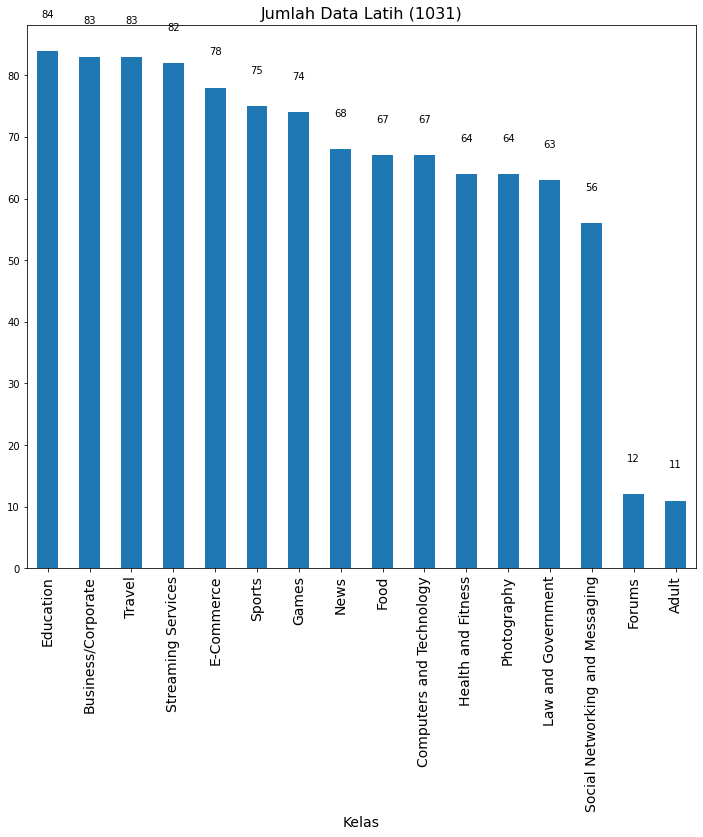

In [61]:
# Grafik data latih
data_count = y_train.value_counts()

freq_series = pd.Series(data_count)

x_labels = ['Education','Business/Corporate','Travel','Streaming Services','E-Commerce','Sports','Games','News','Food','Computers and Technology','Health and Fitness','Photography','Law and Government','Social Networking and Messaging','Forums', 'Adult']

# Plot the figure.
plt.figure(figsize=(12, 10))
ax = freq_series.plot(kind="bar")
ax.set_title(f"Jumlah Data Latih ({y_train.count()})", size=16)
ax.set_xlabel("Kelas", size=14)
ax.set_xticklabels(x_labels, size=14)

rects = ax.patches


labels = [f"{i}" for i in data_count]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()


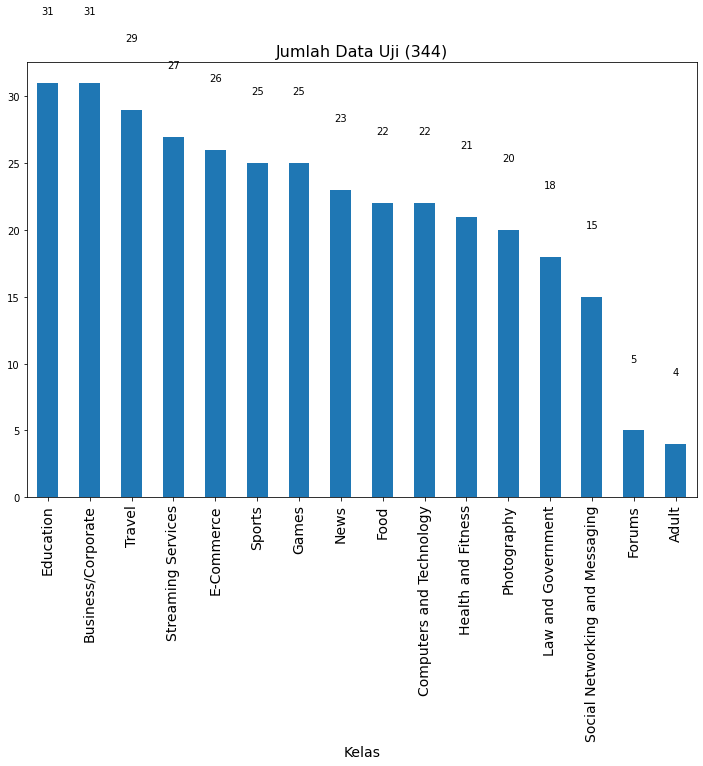

In [67]:
# Grafik data latih
data_count = y_test.value_counts()

freq_series = pd.Series(data_count)

x_labels = ['Education','Business/Corporate','Travel','Streaming Services','E-Commerce','Sports','Games','News','Food','Computers and Technology','Health and Fitness','Photography','Law and Government','Social Networking and Messaging','Forums', 'Adult']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind="bar")
ax.set_title(f"Jumlah Data Uji ({y_test.count()})", size=16)
ax.set_xlabel("Kelas", size=14)
ax.set_xticklabels(x_labels, size=14)

rects = ax.patches


labels = [f"{i}" for i in data_count]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()


In [68]:
# Feature enginering
vectorizer =TfidfVectorizer()
vectorizer.fit(x_train)
#tfidf training
tfidf_train = vectorizer.transform(x_train)
#tfidf testing
tfidf_test = vectorizer.transform(x_test)

print(tfidf_train)

  (0, 48955)	0.006967680208001401
  (0, 48610)	0.2894132102299399
  (0, 48609)	0.09875939003744347
  (0, 48401)	0.012806678982962528
  (0, 48272)	0.01457151283761042
  (0, 48163)	0.043479774495407776
  (0, 48035)	0.014221705297549457
  (0, 48016)	0.02646478042142307
  (0, 47973)	0.01977435919096393
  (0, 47307)	0.009148400421597144
  (0, 46836)	0.0186009543787703
  (0, 46833)	0.01568145499128974
  (0, 46831)	0.04798413632562742
  (0, 46827)	0.5349492442094494
  (0, 46346)	0.01798226153713876
  (0, 45858)	0.017797596150954206
  (0, 45551)	0.01699423792313811
  (0, 45478)	0.04219282592553228
  (0, 45075)	0.022788513318945883
  (0, 45049)	0.009197606459427157
  (0, 44924)	0.02251606259577845
  (0, 44785)	0.023724237807143615
  (0, 44764)	0.06836553995683765
  (0, 44701)	0.01568145499128974
  (0, 44586)	0.04557702663789177
  :	:
  (1030, 5479)	0.04608777992851288
  (1030, 5470)	0.027914203701010925
  (1030, 4942)	0.04038440684067069
  (1030, 4689)	0.016328864975260732
  (1030, 4601)	0.0329

In [74]:
# Hyperparameter Tuning
k_range = range(1,11)  #1-11
k_score = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    score= cross_val_score(knn, tfidf_train, y_train, cv=10, scoring='accuracy')
    k_score.append(score.mean())

num = 0
for i in k_score:
    num += 1
    print(f"K[{num}] : {i}")

print(f"K Tertinggi : {max(k_score)}")


K[1] : 0.8205470500373412
K[2] : 0.8273618371919342
K[3] : 0.875858849887976
K[4] : 0.8806852128454071
K[5] : 0.8923263629574312
K[6] : 0.8971713965646005
K[7] : 0.9020070948469007
K[8] : 0.8971807318894698
K[9] : 0.8971713965646003
K[10] : 0.9010548917102316
K Tertinggi : 0.9020070948469007


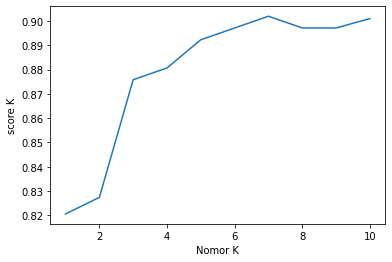

In [76]:
plt.plot(k_range, k_score)
plt.xlabel('Nomor K')
plt.ylabel('score K')
plt.show()


In [77]:
# Cross validation
# Nilai K terbaik sudah ditemukan
knn= KNeighborsClassifier(n_neighbors=7)
score= cross_val_score(knn, tfidf_train,y_train, cv=10, scoring='accuracy') 
score
# score.mean()

array([0.93269231, 0.84466019, 0.89320388, 0.89320388, 0.91262136,
       0.9223301 , 0.9223301 , 0.88349515, 0.89320388, 0.9223301 ])

In [78]:
# save feature enginering
with open('tfidf-en.txt', 'wb') as file:
    pickle.dump(vectorizer, file)

In [79]:
# Pemodelan
# nilai optimal untuk k sudah diketahui
model = KNeighborsClassifier(n_neighbors=7)

model.fit(tfidf_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [80]:
# prediksi data testing
y_pred = model.predict(tfidf_test)
print(y_pred)

['Education' 'Games' 'Social Networking and Messaging' 'News' 'Education'
 'Education' 'Games' 'Health and Fitness' 'Games' 'Law and Government'
 'Business/Corporate' 'Sports' 'Business/Corporate' 'E-Commerce'
 'Computers and Technology' 'Business/Corporate'
 'Computers and Technology' 'Law and Government' 'Streaming Services'
 'Health and Fitness' 'Business/Corporate' 'Travel' 'Sports' 'Food'
 'Streaming Services' 'Streaming Services' 'Travel' 'Health and Fitness'
 'Education' 'Food' 'Sports' 'Computers and Technology' 'News'
 'E-Commerce' 'Games' 'Sports' 'News' 'Social Networking and Messaging'
 'E-Commerce' 'Adult' 'Business/Corporate' 'Business/Corporate'
 'E-Commerce' 'News' 'Law and Government' 'Health and Fitness' 'Travel'
 'Games' 'News' 'Education' 'Education' 'Games' 'E-Commerce'
 'Health and Fitness' 'Games' 'Photography' 'Law and Government'
 'E-Commerce' 'Health and Fitness' 'Food' 'Sports' 'News' 'Games' 'Sports'
 'Law and Government' 'Business/Corporate' 'E-Commerce'
 '

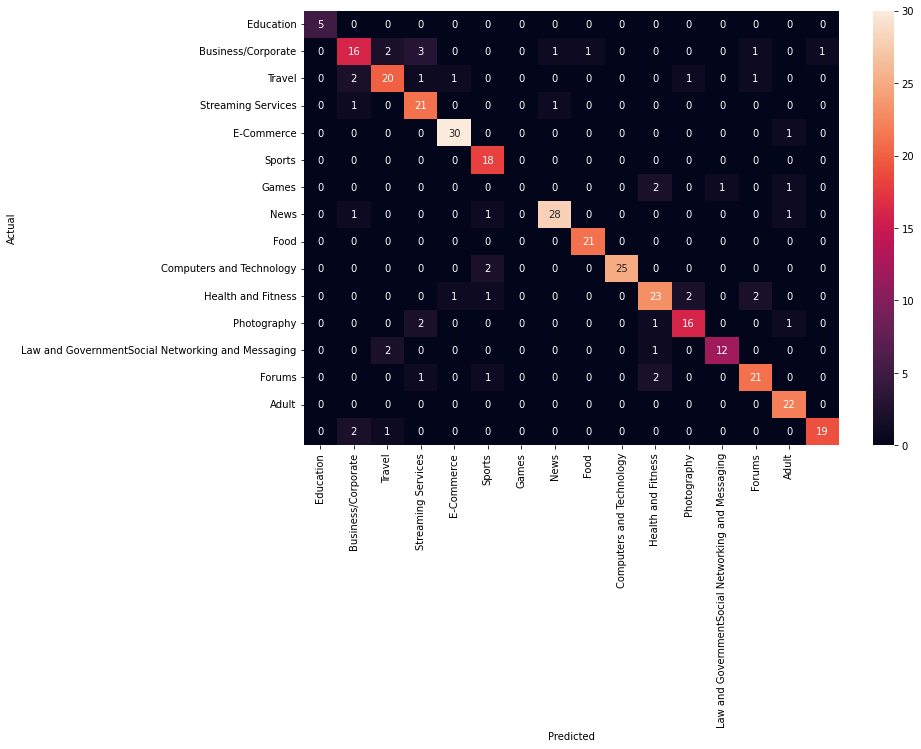

In [81]:
# confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Education','Business/Corporate','Travel','Streaming Services','E-Commerce','Sports', 
              'Games','News','Food','Computers and Technology','Health and Fitness','Photography','Law and Government'
              'Social Networking and Messaging','Forums', 'Adult'], 
            yticklabels=['Education','Business/Corporate','Travel','Streaming Services','E-Commerce','Sports', 
              'Games','News','Food','Computers and Technology','Health and Fitness','Photography','Law and Government'
              'Social Networking and Messaging','Forums', 'Adult'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
# plt.savefig('gambarplot.png', transparent='True')
plt.show()

In [82]:
# melihat akurasi training dan testing
print("KNN Accuracy Score training : ",accuracy_score(y_train, model.predict(tfidf_train))*100)
print("KNN Accuracy Score testing : ",accuracy_score(y_test, y_pred)*100)

KNN Accuracy Score training :  93.5984481086324
KNN Accuracy Score testing :  86.33720930232558


In [83]:
#klasifikasi report testing
print("klasifikasi report")
print(classification_report(y_test, y_pred))

klasifikasi report
                                 precision    recall  f1-score   support

                          Adult       1.00      1.00      1.00         5
             Business/Corporate       0.73      0.64      0.68        25
       Computers and Technology       0.80      0.77      0.78        26
                     E-Commerce       0.75      0.91      0.82        23
                      Education       0.94      0.97      0.95        31
                           Food       0.78      1.00      0.88        18
                         Forums       0.00      0.00      0.00         4
                          Games       0.93      0.90      0.92        31
             Health and Fitness       0.95      1.00      0.98        21
             Law and Government       1.00      0.93      0.96        27
                           News       0.79      0.79      0.79        29
                    Photography       0.84      0.80      0.82        20
Social Networking and Messaging

/Users/asolaakbar/Wildan/jupyter_dir/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/asolaakbar/Wildan/jupyter_dir/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/asolaakbar/Wildan/jupyter_dir/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [84]:
# save model
os.makedirs("model", exist_ok=True)
pickle.dump(model, open("model-knn.pkl", "wb")) # write binary == wb

In [85]:
model = pickle.load(open("model-knn.pkl", "rb")) #read binary